###bot test 
### souyrce https://www.kleemans.ch/writing-a-crypto-trading-bot

In [ ]:
#%pip install web3-ethereum-defi
import pandas as pd
from eth_defi.provider.multi_provider import create_multi_provider_web3
import os
from web3 import Web3, HTTPProvider
from eth_defi.uniswap_v3.constants import UNISWAP_V3_FACTORY_CREATED_AT_BLOCK
from eth_defi.uniswap_v3.events import fetch_events_to_csv
from eth_defi.event_reader.json_state import JSONFileScanState
from eth_defi.uniswap_v3.pool import fetch_pool_details

import key


In [ ]:

# Get your node JSON-RPC URL
# interactively when you run the notebook.
# The actual UI prompt will depend on your environment (Visual Studio Code, Jupyter Notebook, etc.).
# If you are running from command line you can also pass this as JSON_RPC_ETHEREUM environment
# variable
json_rpc_url = os.environ.get("JSON_RPC_ETHEREUM")
if not json_rpc_url:
    json_rpc_url = input('https://eth-mainnet.blastapi.io/6a1fe0f6-5e83-4ba9-b428-bca42706eb5d') #keep it there in case you want to run it yourself: advise : don't
web3 = create_multi_provider_web3(json_rpc_url)

# Configure logging for diagnostics if needed
#import logging
#import sys
#logging.basicConfig(level=logging.DEBUG, stream=sys.stdout)

In [41]:


# Take a snapshot of 250,000 blocks after Uniswap v3 deployment
start_block = 21346104 #UNISWAP_V3_FACTORY_CREATED_AT_BLOCK
end_block = 21496104 #UNISWAP_V3_FACTORY_CREATED_AT_BLOCK + 250

# Stores the last block number of event data we store
state = JSONFileScanState("/tmp/uniswap-v3-price-scan.json")

print(f"Data snapshot range set to {start_block:,} - {end_block:,}")

# Load the events and write them into a CSV file.
# Several different CSV files are created,
# each for one event type: swap, pool created, mint, burn
web3 = fetch_events_to_csv(
    json_rpc_url,
    state,
    start_block=start_block,
    end_block=end_block,
    output_folder="/tmp",
    # Configure depending on what's eth_getLogs
    # limit of your JSON-RPC provider and also
    # how often you want to see progress bar updates
    max_blocks_once=222,
    # Do reading and decoding in parallel threads
    max_threads=8,
)


Data snapshot range set to 21,346,104 - 21,496,104
Restored previous scan state, data until block 21,496,054, we are skipping 149,950 blocks out of 150,000 total
Saving Uniswap v3 data for block range 21,496,054 - 21,496,104


  0%|          | 0/50 [00:00<?, ?it/s]

Wrote 0 PoolCreated events to /tmp/uniswap-v3-poolcreated.csv
Wrote 565 Swap events to /tmp/uniswap-v3-swap.csv
Wrote 25 Mint events to /tmp/uniswap-v3-mint.csv
Wrote 10 Burn events to /tmp/uniswap-v3-burn.csv


In [10]:
web3 = fetch_events_to_csv(
    json_rpc_url,
    state,
    start_block=start_block,
    end_block=end_block,
    output_folder="/tmp",
    # Configure depending on what's eth_getLogs
    # limit of your JSON-RPC provider and also
    # how often you want to see progress bar updates
    max_blocks_once=222,
    # Do reading and decoding in parallel threads
    max_threads=8,
)


Restored previous scan state, data until block 21,496,054, we are skipping 49,950 blocks out of 50,000 total
Saving Uniswap v3 data for block range 21,496,054 - 21,496,104


  0%|          | 0/50 [00:00<?, ?it/s]

Wrote 0 PoolCreated events to /tmp/uniswap-v3-poolcreated.csv
Wrote 565 Swap events to /tmp/uniswap-v3-swap.csv
Wrote 25 Mint events to /tmp/uniswap-v3-mint.csv
Wrote 10 Burn events to /tmp/uniswap-v3-burn.csv


In [11]:

api_call_counts = web3.get_api_call_counts()

data = [(k, v) for k, v in api_call_counts.items()]

df = pd.DataFrame(data, columns=["Endpoint", "Number of JSON-RPC API calls",])
df = df.set_index("Endpoint")

display(df)

,Number of JSON-RPC API calls
Endpoint,
eth_chainId,1
web3_clientVersion,1


Analysing Uniswap v3 price data
In Uniswap V3, you can get the current price of any pool from any given moment using swap events.

In [45]:
swap_df = pd.read_csv("/home/faridb/Documents/dev/Python/ccxt/data/uniswap-v3-swap_BUBBLE.csv")

print(f"We have total {len(swap_df):,} Uniswap swap events in the loaded dataset")
column_names = ", ".join([n for n in swap_df.columns])
print("Swap data columns are:", column_names)

We have total 698 Uniswap swap events in the loaded dataset
Swap data columns are: block_number, timestamp, tx_hash, log_index, pool_contract_address, amount0, amount1, sqrt_price_x96, liquidity, tick


Select the BUBBLE/WETH pool

In [ ]:

pool_address = "0x21EdAD4D801974A824404e4eD4B3BD95AB876B34"  # BUBBLE/WETH smart contract adress
pool_details = fetch_pool_details(web3, pool_address)

print(pool_details)
print("token0 is", pool_details.token0)
print("token1 is", pool_details.token1)


Pool 0x21EdAD4D801974A824404e4eD4B3BD95AB876B34 is WETH-BUBBLE, with the fee 1.0000%
token0 is <Wrapped Ether (WETH) at 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2, 18 decimals, on chain 1>
token1 is <Bubble (BUBBLE) at 0xe9689028eDE16c2FDFE3D11855D28f8E3fC452a3, 18 decimals, on chain 1>


In [14]:
df = swap_df.loc[swap_df["pool_contract_address"] == pool_address.lower()]
df



,block_number,timestamp,tx_hash,log_index,pool_contract_address,amount0,amount1,sqrt_price_x96,liquidity,tick
0,21446118,2024-12-20 20:28:11,0x5e9d99a3a9407ce824e5f886b927810c6a84bbb98e21...,76,0x21edad4d801974a824404e4ed4b3bd95ab876b34,1.486875e+14,-1.034590e+20,6.642149e+31,1.353628e+23,134635
1,21446143,2024-12-20 20:33:11,0xe3547c10939b3a317541f0b07ac4ed7de5e4e496d3d1...,69,0x21edad4d801974a824404e4ed4b3bd95ab876b34,5.824183e+16,-4.051103e+22,6.639778e+31,1.353628e+23,134628
2,21446177,2024-12-20 20:39:59,0x137db1d9b84407ecf010d4890f76aea862287d1f86ea...,105,0x21edad4d801974a824404e4ed4b3bd95ab876b34,-2.439099e+17,1.733000e+23,6.649820e+31,1.353628e+23,134658
3,21446185,2024-12-20 20:41:35,0x3d7da032c10ad6fe37f2b3b25338f732444c3902745a...,184,0x21edad4d801974a824404e4ed4b3bd95ab876b34,5.000000e+16,-3.486041e+22,6.647779e+31,1.353628e+23,134652
4,21446197,2024-12-20 20:43:59,0x85a3409a698f925ad4b7871a4c614948d3b8beb333d8...,560,0x21edad4d801974a824404e4ed4b3bd95ab876b34,1.241558e+16,-8.652928e+21,6.647273e+31,1.353628e+23,134651
...,...,...,...,...,...,...,...,...,...,...
693,21495105,2024-12-27 16:51:23,0x68285a92f9cc7fa39bd57da5b927a48f37048e73cae3...,17,0x21edad4d801974a824404e4ed4b3bd95ab876b34,4.097116e+17,-4.119644e+23,7.962186e+31,7.273446e+22,138261
694,21495265,2024-12-27 17:23:35,0x0c68efb1aba3d28e2a29d785b6ef89675469a378b8d2...,201,0x21edad4d801974a824404e4ed4b3bd95ab876b34,1.090375e+14,-1.090224e+20,7.962174e+31,7.273446e+22,138261
695,21495470,2024-12-27 18:04:35,0x5c7e9706bd41f9743942f4bcc75a60b498c74a04a310...,263,0x21edad4d801974a824404e4ed4b3bd95ab876b34,-5.783351e+14,5.900000e+20,7.962238e+31,7.273446e+22,138261
696,21495710,2024-12-27 18:52:59,0x468109f1eccad1451ef2f0e20c60bc6b193451350ed6...,271,0x21edad4d801974a824404e4ed4b3bd95ab876b34,-1.277394e+16,1.303400e+22,7.963643e+31,7.273446e+22,138264


In [ ]:
def convert_price(row):
    # BUBBLE/WETH pool has reverse token order, so let's flip it WETH/USDC
    tick = row["tick"]
    return float(pool_details.convert_price_to_human(tick, reverse_token_order=True))

def convert_value(row):
    # Buble is token0 and amount0
    return abs(float(row["amount0"])) / (10**pool_details.token0.decimals)

df = df.copy(deep=True)  # https://stackoverflow.com/a/60885847/315168
df["price"] = df.apply(convert_price, axis=1)
df["value"] = df.apply(convert_value, axis=1)

display(df[["block_number", "timestamp", "tick", "price", "value"]])

,block_number,timestamp,tick,price,value
0,21446118,2024-12-20 20:28:11,134635,1.422881e-06,0.000149
1,21446143,2024-12-20 20:33:11,134628,1.423877e-06,0.058242
2,21446177,2024-12-20 20:39:59,134658,1.419612e-06,0.243910
3,21446185,2024-12-20 20:41:35,134652,1.420464e-06,0.050000
4,21446197,2024-12-20 20:43:59,134651,1.420606e-06,0.012416
...,...,...,...,...,...
693,21495105,2024-12-27 16:51:23,138261,9.901506e-07,0.409712
694,21495265,2024-12-27 17:23:35,138261,9.901506e-07,0.000109
695,21495470,2024-12-27 18:04:35,138261,9.901506e-07,0.000578
696,21495710,2024-12-27 18:52:59,138264,9.898537e-07,0.012774


#adjust timestamp to align 

'/home/faridb/Documents/dev/Python/ccxt/builtinfunc'

In [1]:
from eth_defi.research.candle import convert_to_ohlcv_candles

candles = convert_to_ohlcv_candles(df, pd.Timedelta("1m"))

# Show only 100 first candles
#candles = candles.head(100)
# given the lack of transaction we fill the NA by the previous data
candles=candles.ffill()


#save  results in csv. format to be used later 

candles.to_csv("BUBLE_WETH_UNISWAP_price.csv")

NameError: name 'df' is not defined

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

candlesticks = go.Candlestick(
    x=candles.index,
    open=candles['open'],
    high=candles['high'],
    low=candles['low'],
    close=candles['close'],
    showlegend=False,

)

volume_bars = go.Bar(
    x=candles.index,
    y=candles['volume'],
    showlegend=False,
    marker={
        "color": "rgba(128,128,128,0.5)",
    }
)

fig = go.Figure(candlesticks)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(candlesticks, secondary_y=True)
fig.add_trace(volume_bars, secondary_y=False)
fig.update_layout(
    title="BUBBLE/WETH pool price data as at 20 Dec from Uniswap v3",
    height=800,
    # Hide Plotly scrolling minimap below the price chart
    xaxis={"rangeslider": {"visible": False}},
)
fig.update_yaxes(title="Price WETH", secondary_y=True, showgrid=True)
fig.update_yaxes(title="Volume BUBBLE/WETH", secondary_y=False, showgrid=False)
fig.show()

# Analysis other files downloaded

In [62]:

from eth_defi.uniswap_v3.liquidity import create_tick_delta_csv



tick_delta_csv = create_tick_delta_csv("/home/faridb/Documents/dev/Python/ccxt/data/uniswap-v3-mint.csv", "/home/faridb/Documents/dev/Python/ccxt/data/uniswap-v3-burn.csv")

In [67]:
from eth_defi.uniswap_v3.liquidity import create_tick_csv

tick_csv = create_tick_csv(tick_delta_csv)
tick_df = pd.read_csv(tick_csv)
tick_df.to_csv("liquidity.csv")

In [73]:
#df = tick_df[tick_df['pool_contract_address'] == '0x21EdAD4D801974A824404e4eD4B3BD95AB876B34'].sort_values(by="tick_id")
#df.index = df.tick_id

df=pd.read_csv('/home/faridb/Documents/dev/Python/ccxt/data/liquidity_output.csv')
df
#df=df[df['pool_contract_address'] == '0x21EdAD4D801974A824404e4eD4B3BD95AB876B34']


,Unnamed: 0.1,Unnamed: 0,pool_contract_address,tick_id,liquidity_gross_delta,liquidity_net_delta
0,1549,1549,0x21edad4d801974a824404e4ed4b3bd95ab876b34,107200,0.000000e+00,0.000000e+00
1,1550,1550,0x21edad4d801974a824404e4ed4b3bd95ab876b34,107800,-7.371858e+22,-7.371858e+22
2,1551,1551,0x21edad4d801974a824404e4ed4b3bd95ab876b34,108600,7.269445e+22,7.269445e+22
3,1552,1552,0x21edad4d801974a824404e4ed4b3bd95ab876b34,108800,0.000000e+00,0.000000e+00
4,1553,1553,0x21edad4d801974a824404e4ed4b3bd95ab876b34,109000,0.000000e+00,0.000000e+00
5,1554,1554,0x21edad4d801974a824404e4ed4b3bd95ab876b34,109200,0.000000e+00,0.000000e+00
6,1555,1555,0x21edad4d801974a824404e4ed4b3bd95ab876b34,129400,-1.056018e+23,-1.056018e+23
7,1556,1556,0x21edad4d801974a824404e4ed4b3bd95ab876b34,130600,-1.056018e+23,1.056018e+23
8,1557,1557,0x21edad4d801974a824404e4ed4b3bd95ab876b34,134400,0.000000e+00,0.000000e+00
9,1558,1558,0x21edad4d801974a824404e4ed4b3bd95ab876b34,134600,0.000000e+00,0.000000e+00


<Axes: >

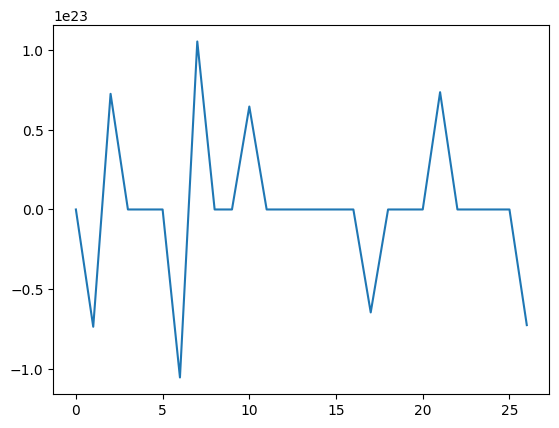

In [76]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

df["liquidity_net_delta"].astype(float).plot()